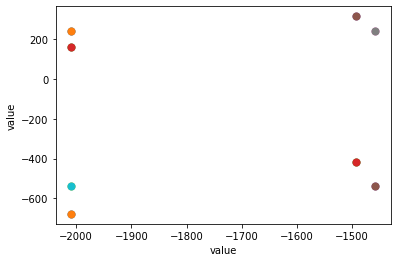

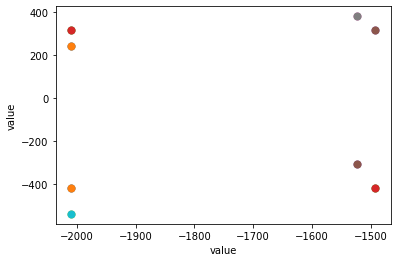

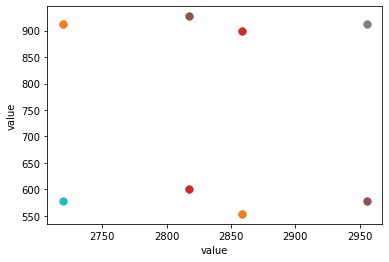

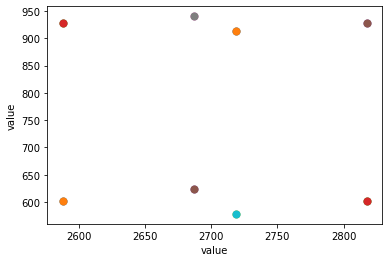

In [3]:
import numpy as np
import matplotlib.pyplot as plt


length = 20 #define the general location of the room.
width = 30
height = 10
h = 5   #define the height of the camera of variable h.


def Active_Tracker_Camera(position_of_one_person):    #input a 8*3 matrix as the 8 position of a person.
    #define the internal parameter f, Distinguishability, Sensor_size, reference to NiKon D700
    f =  35*10**(-3)                            
    Distinguishability = [4256,2832]
    Sensor_size = [36.0*10**(-3),23.9*10**(-3)]
    camera_data = [f, Distinguishability, Sensor_size]
    position_in_camera = np.zeros((32,3))
    position_in_pixel = np.zeros((32,3))
    result = np.zeros((32,3))
    #to calculate the internal parameter matrix, which can transform the position in camera   

    dx = Sensor_size[0] / Distinguishability[0]
    dy = Sensor_size[1] / Distinguishability[1]
    fx = f / dx
    fy = f / dy
    u0 = Distinguishability[0] / 2
    v0 = Distinguishability[1] / 2

    internal_parameter_matrix = np.zeros((3,3))
    internal_parameter_matrix[0,0] = fx
    internal_parameter_matrix[1,1] = fy
    internal_parameter_matrix[2,2] = 1
    internal_parameter_matrix[0,2] = u0
    internal_parameter_matrix[1,2] = v0
    internal_parameter_matrix = np.mat(internal_parameter_matrix)

    camera1 = [length/2, width/2, h]
    camera2 = [length/2, -width/2, h]
    camera3 = [-length/2, width/2, h]
    camera4 = [-length/2, -width/2, h]
    camera = [camera1, camera2, camera3, camera4, camera_data]

    def World_Position_To_Camera_Position(position_of_one_person, camera):
        angle = np.pi / 4
        allpoints_in_camerascreen = np.zeros((32,3))
        for i in range(4):
            x_c = camera[i][0]  # The camera position (x_c, y_c, z_c) in the world
            y_c = camera[i][1]
            z_c = camera[i][2]
            
            current_point  = np.zeros((1,3))
        
            for j in range(8):
                x_p = position_of_one_person[j,0]  # One of eight points of the person's position in the world
                y_p = position_of_one_person[j,1]
                z_p = position_of_one_person[j,2]
                z = np.abs(x_p - x_c) * np.cos(angle) + np.abs(y_p - y_c) * np.sin(angle)       #   The distance in xy-plant of the person to the camera
                x_dis = np.abs(x_p - x_c) * np.sin(angle) - np.abs(y_p - y_c) * np.cos(angle)   #   The world distance of the person in x-orientation of the camera-axis
                y = (z_p - z_c)/z  # The y coordinate of this point in camera screen
                x = x_dis/z         # the x coordinate of this point in camera screen
                current_point[0,0] = x
                current_point[0,1] = y
                current_point[0,2] = 1
                allpoints_in_camerascreen[8*i + j] = current_point

        return allpoints_in_camerascreen

    position_in_camera = position_in_camera + World_Position_To_Camera_Position(position_of_one_person, camera)


    #transform the camera position to the pixel position by /dx and /dy, and add u0, v0 to change the origin to the left_up point
    #all of above can complete by *internal_parameter_matrix

    a = np.zeros((1,3))

    for i in range (32):
        a = np.transpose(position_in_camera[i])
        a = np.mat(a)
        a = a.T
        position_in_pixel = np.dot(internal_parameter_matrix,a)
        position_in_pixel = np.transpose(position_in_pixel)
        result[i] = position_in_pixel

    return result

position_of_one_person = np.matrix('10,0,2;10,1,2;11,0,2;11,1,2;10,0,0;10,1,0;11,0,0;11,1,0')
result = Active_Tracker_Camera(position_of_one_person)
x_axis = []
y_axis = []
for j in range(4):
    for i in range(8):
        x = result[i + 8*j][0]
        y = result[i + 8*j][1]
        plt.scatter(x,y,50)
        plt.scatter(x,y,50)
    plt.xlabel("value",fontsize = 10)
    plt.ylabel("value",fontsize = 10)
    plt.show()




[[1.30044444e+03 2.42971981e+02 1.00000000e+00]
 [1.30044444e+03 4.77577585e+02 1.00000000e+00]
 [1.43837037e+03 1.94095813e+02 1.00000000e+00]
 [1.09355556e+03 1.94095813e+02 1.00000000e+00]
 [1.22848309e+03 1.40969544e+02 1.00000000e+00]
 [1.09355556e+03 4.38476651e+02 1.00000000e+00]
 [1.43837037e+03 4.38476651e+02 1.00000000e+00]
 [1.22848309e+03 3.95975635e+02 1.00000000e+00]
 [1.30044444e+03 2.42971981e+02 1.00000000e+00]
 [1.30044444e+03 4.77577585e+02 1.00000000e+00]
 [1.17312821e+03 2.88088443e+02 1.00000000e+00]
 [1.09355556e+03 1.94095813e+02 1.00000000e+00]
 [9.69422222e+02 2.42971981e+02 1.00000000e+00]
 [1.09355556e+03 4.38476651e+02 1.00000000e+00]
 [1.17312821e+03 5.13670754e+02 1.00000000e+00]
 [9.69422222e+02 4.77577585e+02 1.00000000e+00]
 [1.30044444e+03 2.42971981e+02 1.00000000e+00]
 [1.30044444e+03 4.77577585e+02 1.00000000e+00]
 [1.43837037e+03 1.94095813e+02 1.00000000e+00]
 [1.49141880e+03 2.88088443e+02 1.00000000e+00]
 [1.63146667e+03 2.42971981e+02 1.000000